In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mta2024_v2_20250503.csv")


In [3]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,11/01/2024 06:00:00 PM,subway,65,79 St (D),Brooklyn,omny,OMNY - Students,17,0,40.613503,-74.00061,POINT (-74.00061 40.613503)
1,11/01/2024 06:00:00 PM,subway,272,"36 St (M,R)",Queens,omny,OMNY - Students,8,0,40.752040,-73.92878,POINT (-73.92878 40.75204)
2,11/01/2024 06:00:00 PM,subway,80,"121 St (J,Z)",Queens,omny,OMNY - Other,1,0,40.700493,-73.82829,POINT (-73.82829 40.700493)
3,11/01/2024 06:00:00 PM,subway,295,231 St (1),Bronx,metrocard,Metrocard - Full Fare,43,11,40.878857,-73.90483,POINT (-73.90483 40.878857)
4,11/01/2024 06:00:00 PM,subway,41,"7 Av (B,Q)",Brooklyn,omny,OMNY - Students,25,1,40.677050,-73.97237,POINT (-73.97237 40.67705)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768584 entries, 0 to 4768583
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 436.6+ MB


In [5]:
df.describe()

,ridership,transfers,latitude,longitude
count,4.768584e+06,4.768584e+06,4.768584e+06,4.768584e+06
mean,4.331912e+01,1.757665e+00,4.073292e+01,-7.393584e+01
std,1.844285e+02,1.148270e+01,7.803442e-02,5.586347e-02
min,1.000000e+00,0.000000e+00,4.057613e+01,-7.407484e+01
25%,3.000000e+00,0.000000e+00,4.067833e+01,-7.398163e+01
50%,9.000000e+00,0.000000e+00,4.072591e+01,-7.394764e+01
75%,2.700000e+01,1.000000e+00,4.079164e+01,-7.390074e+01
max,1.621700e+04,1.354000e+03,4.090313e+01,-7.375540e+01


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64

In [8]:
df.columns

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')

In [9]:
bor_rid_sum=df.groupby("borough")['ridership'].sum().sort_values(ascending=False)
bor_rid_sum

borough
Manhattan        117401286
Brooklyn          45031311
Queens            30061701
Bronx             13717559
Staten Island       358987
Name: ridership, dtype: int64

Text(0.5, 1.0, 'ilçelere göre yolcu metro sayısı')

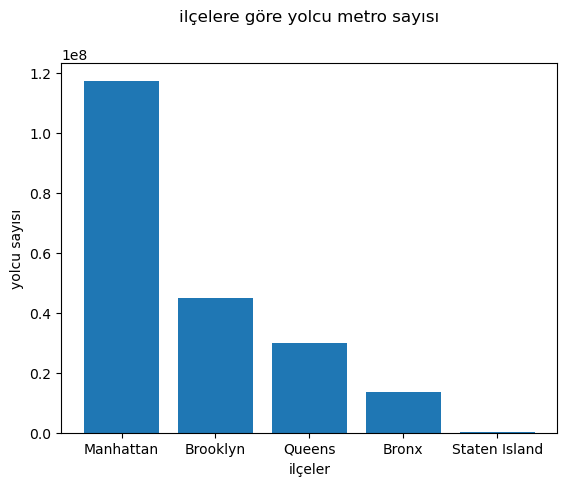

In [10]:
plt.bar(bor_rid_sum.index,bor_rid_sum.values)
plt.xlabel("ilçeler")
plt.ylabel("yolcu sayısı")
plt.title("ilçelere göre yolcu metro sayısı",pad=30)

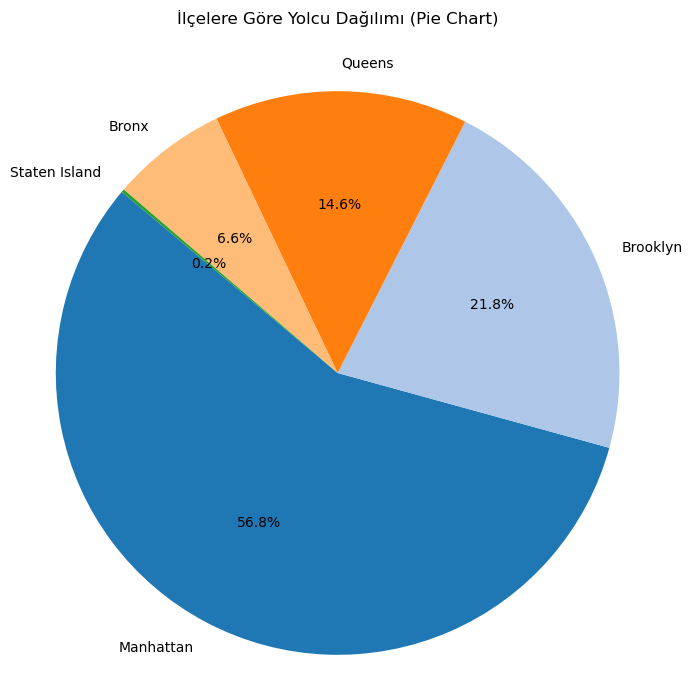

In [11]:
colors = plt.cm.tab20.colors  
plt.figure(figsize=(8, 8))
plt.pie(bor_rid_sum, labels=bor_rid_sum.index, autopct='%1.1f%%', startangle=140, colors=colors[:len(bor_rid_sum)])

plt.title("İlçelere Göre Yolcu Dağılımı (Pie Chart)",pad=30)
plt.axis('equal')  
plt.show()

In [4]:
sta_sum=df.groupby("station_complex")["ridership"].sum().sort_values(ascending=False)
sta_sum.head(10)

station_complex
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)      7902187
Grand Central-42 St (S,4,5,6,7)                       5722856
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                     4476315
14 St-Union Sq (L,N,Q,R,W,4,5,6)                      4029077
34 St-Penn Station (A,C,E)                            3186130
Fulton St (A,C,J,Z,2,3,4,5)                           3179276
34 St-Penn Station (1,2,3)                            3020481
59 St-Columbus Circle (A,B,C,D,1)                     2911419
47-50 Sts-Rockefeller Ctr (B,D,F,M)                   2524840
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)    2441571
Name: ridership, dtype: int64

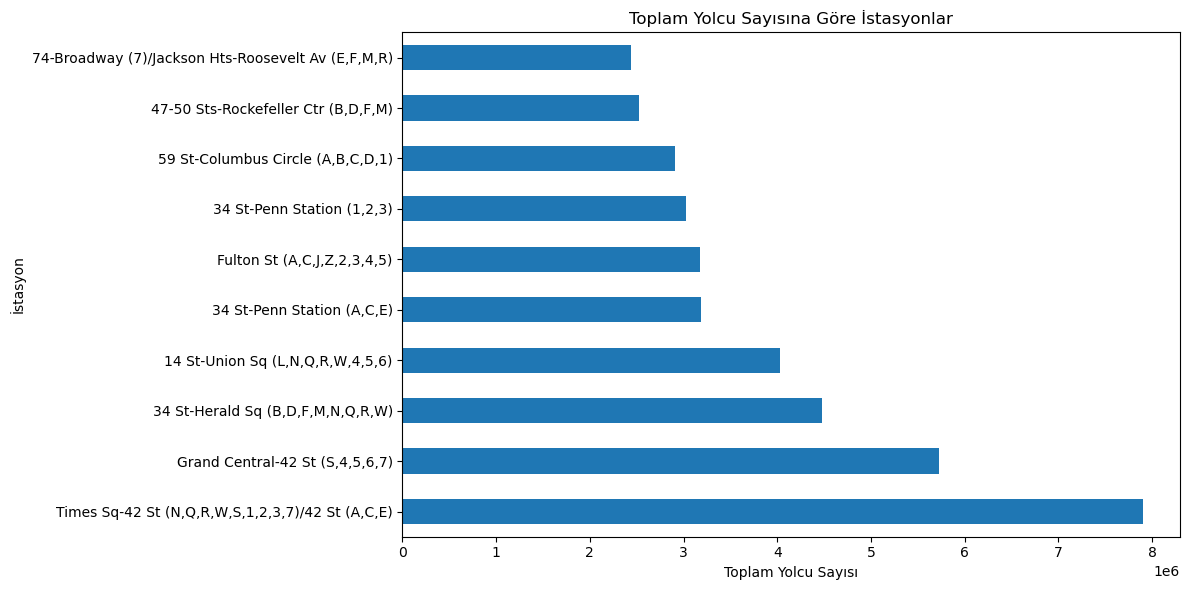

In [5]:
plt.figure(figsize=(12, 6))
sta_sum.iloc[:10,].plot(kind="barh")
plt.title("Toplam Yolcu Sayısına Göre İstasyonlar")
plt.xlabel("Toplam Yolcu Sayısı")
plt.ylabel("İstasyon")
plt.tight_layout()
plt.show()

In [6]:
df["transit_timestamp_2"]=pd.to_datetime(df["transit_timestamp"])

C:\Users\omer_\AppData\Local\Temp\ipykernel_12168\1031764698.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["transit_timestamp_2"]=pd.to_datetime(df["transit_timestamp"])


In [7]:
df["Day"]=df["transit_timestamp_2"].dt.day_name()
df["hour"]=df["transit_timestamp_2"].dt.hour

In [8]:
day_total=df.groupby("Day")['ridership'].sum()
day_total

Day
Friday       31192820
Monday       33692101
Saturday     24744133
Sunday       19936010
Thursday     30688121
Tuesday      35110867
Wednesday    31206792
Name: ridership, dtype: int64

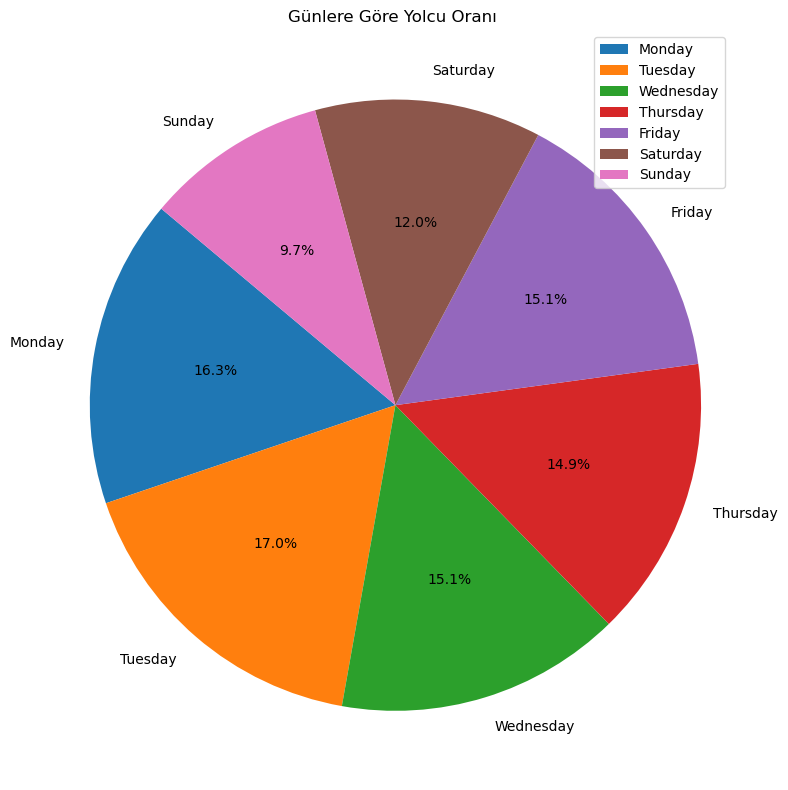

In [9]:
day_total=day_total.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(8,8))
day_total.plot(
    kind="pie",
    autopct="%1.1f%%",        
    startangle=140,           
    legend=False,
    ylabel=''                 
)
plt.title("Günlere Göre Yolcu Oranı ")
plt.axis("equal")  
plt.tight_layout()
plt.legend()
plt.show()

In [12]:
day_total

Day
Monday       33692101
Tuesday      35110867
Wednesday    31206792
Thursday     30688121
Friday       31192820
Saturday     24744133
Sunday       19936010
Name: ridership, dtype: int64

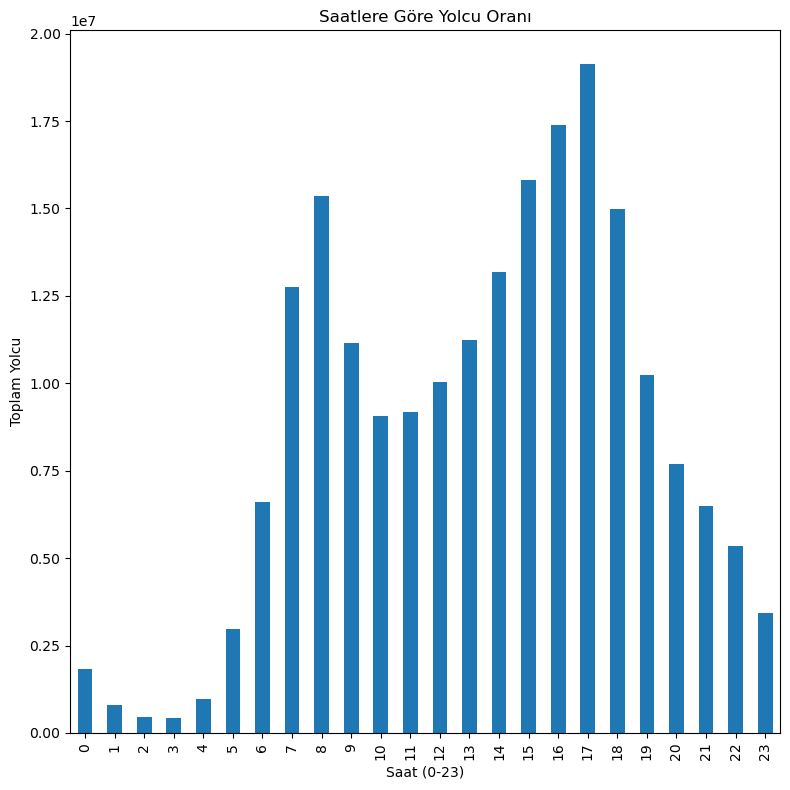

In [10]:
hour_total=df.groupby("hour")['ridership'].sum()


plt.figure(figsize=(8,8))
hour_total.plot(kind="bar")
plt.title("Saatlere Göre Yolcu Oranı")
plt.xlabel("Saat (0-23)")
plt.ylabel("Toplam Yolcu")
plt.tight_layout()
plt.show()

In [11]:
hour_total


hour
0      1833929
1       812036
2       463924
3       439552
4       970577
5      2972227
6      6596104
7     12755881
8     15343866
9     11140537
10     9052402
11     9190749
12    10045055
13    11246768
14    13182657
15    15817225
16    17375043
17    19136767
18    14980256
19    10249448
20     7691331
21     6500393
22     5332628
23     3441489
Name: ridership, dtype: int64

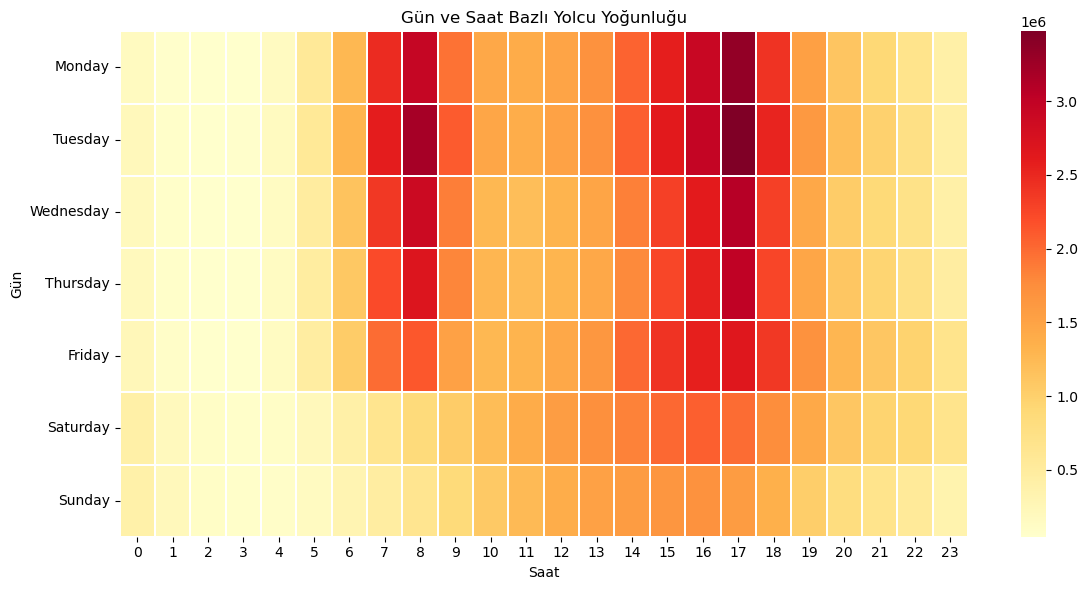

In [19]:
pivot_df = df.pivot_table(values='ridership', index='Day', columns='hour', aggfunc='sum')

# Günleri haftalık sıraya al
pivot_df = pivot_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12,6))
sns.heatmap(pivot_df, cmap="YlOrRd", linewidths=0.3, annot=False, fmt=".0f")
plt.title("Gün ve Saat Bazlı Yolcu Yoğunluğu")
plt.xlabel("Saat")
plt.ylabel("Gün")
plt.tight_layout()
plt.show()

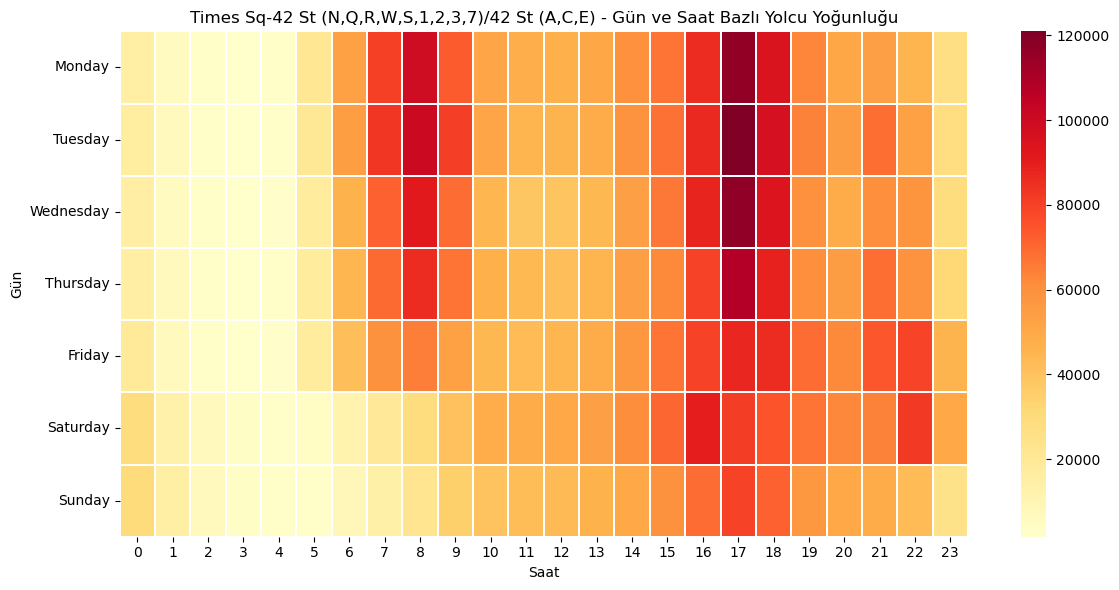

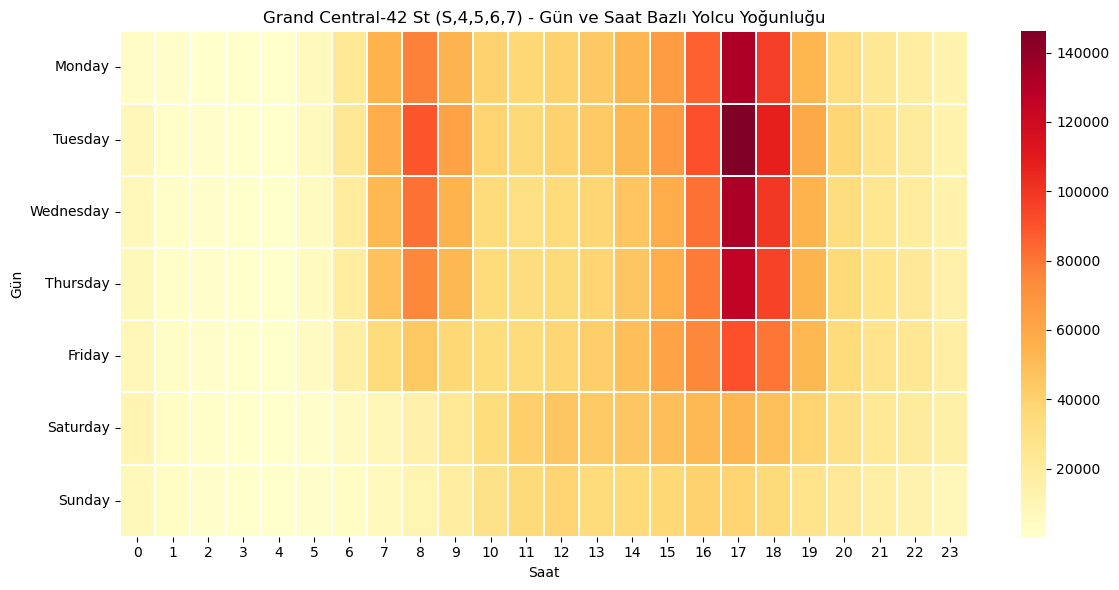

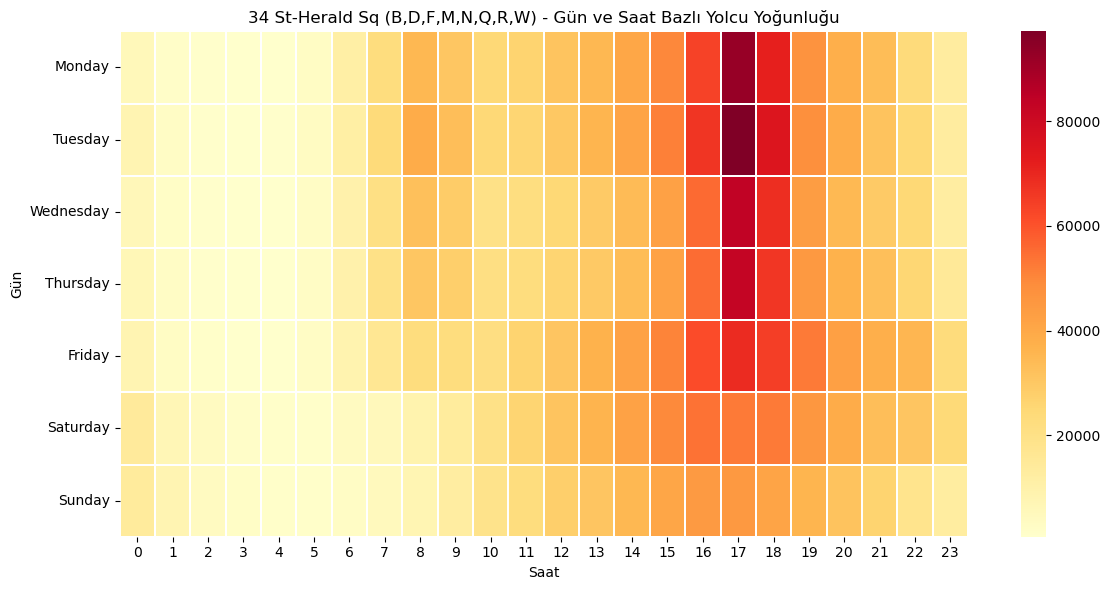

In [75]:
top3_stations = df.groupby('station_complex')['ridership'].sum().sort_values(ascending=False).head(3).index

# 2. Günleri haftalık sıraya sokmak için referans
gun_sirasi = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 3. Her istasyon için heatmap çiz
for station in top3_stations:
    subset = df[df['station_complex'] == station]
    
    # Gün ve saat bazlı pivot tablo
    pivot = subset.pivot_table(values='ridership', index='Day', columns='hour', aggfunc='sum')
    
    # Gün sıralamasını düzelt
    pivot = pivot.reindex(gun_sirasi)

    # Grafik çiz
    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, cmap="YlOrRd", linewidths=0.3)
    plt.title(f"{station} - Gün ve Saat Bazlı Yolcu Yoğunluğu")
    plt.xlabel("Saat")
    plt.ylabel("Gün")
    plt.tight_layout()
    plt.show()

In [ ]:
station_totals = df.groupby(['station_complex', 'latitude', 'longitude'])['ridership'].sum().reset_index()

top_10_stations = station_totals.sort_values(by='ridership', ascending=False).head(10)

import folium

# Haritayı başlat (New York merkezi)
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Marker ekle
for _, row in top_10_stations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['station_complex']}<br>Yolcu Sayısı: {int(row['ridership']):,}",
        icon=folium.Icon(color='red', icon='subway')
    ).add_to(m)

# Haritayı kaydet
m.save("top_10_metro_stations_map.html")
print("Harita oluşturuldu: top_10_metro_stations_map.html")


In [ ]:
import folium
from folium.plugins import HeatMap

# New York merkezli bir harita oluştur (başlangıç görünümü için)
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Sadece geçerli enlem, boylam ve ridership olanları filtrele
heat_data = df.dropna(subset=["latitude", "longitude", "ridership"])

# Isı haritası verisini hazırla: [lat, lon, yolcu sayısı]
heat_points = heat_data[["latitude", "longitude", "ridership"]].values.tolist()

# Isı haritasını ekle
HeatMap(heat_points, radius=12, blur=15, max_zoom=13).add_to(m)

# Haritayı HTML olarak kaydet
m.save("nyc_metro_heatmap.html")
